In [51]:
import tushare as ts
import akshare as ak
import pandas as pd
import baostock as bs
import datetime
import time
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def bao_2_df(bsquery):
    rs = bsquery
    rlist = []
    result = []
    while ((rs.error_code == '0') & rs.next()):
        rlist.append(rs.get_row_data())
    result = pd.DataFrame(rlist, columns=rs.fields)
    print("done!")
    return result

In [3]:
def codetransform(plaincode,api):
    switch = {"0": "sz",
              "2": "sz",
              "3": "sz",
              "5": "sh",
              "6": "sh",
              "7": "sh",
              "9": "sh"
             }
    market = switch.get(plaincode[0:1])
    if api == "ts":
        return plaincode
    elif api == "ak":
        return str(market+plaincode)
    elif api == "bs":
        return str(market+"."+plaincode)
    elif api == "ts_pro":
        return str(plaincode+"."+market.upper())
    else:
        print("CodeTransform Error: api not recognized")
        return plaincode

In [4]:
def stocktick(stock):
    bs.login()
    df = bao_2_df(bs.query_trade_dates(start_date="2019-01-01", end_date="2019-12-31"))
    dic = {}
    for i in range(1,13):
        dic[str(i)] = [0,0]
    for i,row in df.iterrows():
        datestr = row['calendar_date']
        date = datetime.datetime.strptime(datestr, '%Y-%m-%d')
        if (row["is_trading_day"] == str(1)):
            dic[str(date.month)][1]+=1
            buysell = [1,1]#buy-sell#
            tick = ts.get_tick_data(stock,date = datestr,src='tt')
            try:
                for j,r in tick.iterrows():
                    if r["type"] == "卖盘":
                        buysell[0] +=1
                    elif r["type"] == "买盘":
                        buysell[1] += 1
            except AttributeError:
                print("AttributeError@"+datestr)
            if  float(buysell[1]-buysell[0])/float(buysell[0]+buysell[1]) > 0:#委比
                dic[str(date.month)][0] += 1
    return dic

In [40]:
def index(i,cl):
    if i < len(cl):
        return i
    else: 
        return index(i - len(cl),cl)

Data Availability:
仅能找到2018年之后的数据

对2020年6月沪深300的股票
选取2019年一年的月度数据，委比>0的天数占交易日的比重和下月的涨幅

这是一个$O(n)$的方法但是似乎特别慢

In [74]:
bs.login()
data =[[],[],[]]
for cod in ts.get_hs300s()["code"].values:
    time.sleep(1)
    rs = bs.query_history_k_data_plus(code = codetransform(cod,api = "bs"),fields="date,close,pctChg",start_date='2019-01-01', end_date='2020-01-31',frequency="m")
    dic = stocktick(cod)
    df_rs = bao_2_df(rs)["pctChg"]
    for i in dic.keys():
        try:
            data[0].append(cod)
            data[1].append(dic[i][0]/dic[i][1])
            data[2].append(float(df_rs[int(i)])/100)
        except KeyError or IndexError:
            print("KeyError"+str(cod)+";"+str(i))
            continue
bs.logout()

df = pd.DataFrame()
df["Stock"] = data[0]
df["Order"] = data[1]
df["FutureGrowth"] = data[2]
df.to_csv("OrderFlow.csv")

df = pd.DataFrame()
df["Stock"] = data[0]
df["Order"] = data[1]
df["FutureGrowth"] = data[2]

plt.style.use("default")
fig, ax = plt.subplots(1)

df_loc = df.loc[(df["FutureGrowth"] > 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$gain$"),color = "red")

df_loc = df.loc[(df["FutureGrowth"] <= 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$loss$"),color = "green")

plt.xlabel("Comittee>0 in a month")
plt.ylabel("Future Gain")

login success!
login success!
done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190102
AttributeError@2019-01-02
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190109
AttributeError@2019-01-09
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190110
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190115
http://stock.gtimg.cn/data/index.php?appn=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190523
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190524
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190527
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190528
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190529
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190530
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190531
AttributeError@2019-05-31
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190603
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190604
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20190605
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191009
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191010
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191011
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191014
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191015
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191016
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191017
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191018
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191021
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191022
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600000&d=20191023
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190228
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190301
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190304
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190305
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190306
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190307
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190308
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190311
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190711
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190712
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190715
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190716
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190717
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190718
AttributeError@2019-07-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190719
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190722
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190723
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190724
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20190725
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191202
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191203
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191204
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191205
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191206
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191209
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191210
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600004&d=20191212
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190417
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190418
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190419
AttributeError@2019-04-19
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190422
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190423
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190424
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190425
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190426
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190429
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190430
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190506
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190829
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190830
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190902
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190903
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190904
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190905
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190906
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190909
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190910
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190911
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600009&d=20190912
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190117
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190118
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190122
AttributeError@2019-01-22
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190123
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190124
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190130
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190131
http://stock.gtim

AttributeError@2019-06-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190611
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190612
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190613
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190614
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190617
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190618
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190619
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190620
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190621
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190624
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20190625
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191028
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191029
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191030
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191031
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191101
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191105
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191106
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600010&d=20191111
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190313
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190314
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190315
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190318
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190319
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190320
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190321
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190322
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190325
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190326
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190327
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190729
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190730
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190731
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190801
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190802
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190805
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190806
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190807
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190808
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190809
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20190812
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191216
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191217
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191218
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191219
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191223
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191224
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600011&d=20191230
http://stock.gtimg.cn/data/index.php?appn=d

AttributeError@2019-04-30
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190506
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190507
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190508
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190509
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190510
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190513
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190514
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190515
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190516
AttributeError@2019-05-16
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190517
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190916
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190917
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190918
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190919
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190920
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190923
AttributeError@2019-09-23
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190924
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190925
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190926
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190927
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600015&d=20190930
AttributeError@20

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190131
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190201
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190212
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190214
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190215
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190218
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190219
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190221
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190625
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190626
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190627
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190628
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190701
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190702
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190703
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190704
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190705
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190708
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190709
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191112
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191113
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191118
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191119
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191120
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191125
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190326
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190327
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190328
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190329
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190401
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190402
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190403
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190404
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190408
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190409
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190410
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190809
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190812
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190813
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190814
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190815
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190816
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190819
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190820
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190821
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190822
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20190823
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20191227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20191230
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600018&d=20191231
done!
login success!
done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190102
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190109
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190110
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190111
http://stock.gti

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190523
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190524
AttributeError@2019-05-24
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190527
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190528
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190529
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190530
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190531
AttributeError@2019-05-31
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190603
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20190604
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191010
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191011
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191014
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191015
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191016
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191017
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191018
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191021
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191022
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191023
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600019&d=20191024
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190228
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190301
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190304
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190305
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190306
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190307
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190308
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190311
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190312
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190715
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190716
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190717
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190718
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190719
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190722
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190723
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190724
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190725
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190726
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20190729
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191202
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191203
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191204
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191205
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191206
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191209
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191210
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191212
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600023&d=20191216
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190417
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190418
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190419
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190422
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190423
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190424
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190425
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190426
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190429
AttributeError@2019-04-29
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190430
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190506
AttributeError@20

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190829
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190830
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190902
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190903
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190904
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190905
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190906
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190909
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190910
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190911
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600025&d=20190912
AttributeError@2019-09-12
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190117
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190118
AttributeError@2019-01-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190122
AttributeError@2019-01-22
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190123
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190124
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190130
AttributeError@2019-01-30
http://stock.gtimg.cn/data/index.php?appn=detail&act

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190610
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190611
AttributeError@2019-06-11
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190612
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190613
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190614
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190617
AttributeError@2019-06-17
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190618
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190619
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190620
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20190621
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191025
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191028
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191029
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191030
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191031
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191101
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191105
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191106
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600027&d=20191108
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190314
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190315
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190318
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190319
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190320
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190321
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190322
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190325
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190326
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190327
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190328
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190730
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190731
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190801
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190802
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190805
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190806
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190807
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190808
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190809
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190812
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20190813
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191217
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191218
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191219
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191223
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191224
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191230
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600028&d=20191231
done!
login success!
done!
http://stock.gti

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190509
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190510
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190513
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190514
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190515
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190516
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190517
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190520
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190521
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190523
AttributeError@2019-05-23
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190919
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190920
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190923
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190924
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190925
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190926
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190927
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20190930
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20191008
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20191009
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600029&d=20191010
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190214
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190215
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190218
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190219
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190221
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190222
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190227
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190702
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190703
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190704
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190705
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190708
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190709
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190710
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190711
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190712
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190715
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190716
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191119
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191120
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191126
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191127
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191202
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191203
http://stock.gtimg.cn/data/index.php?appn=d

KeyboardInterrupt: 

Text(0, 0.5, 'Future Gain')

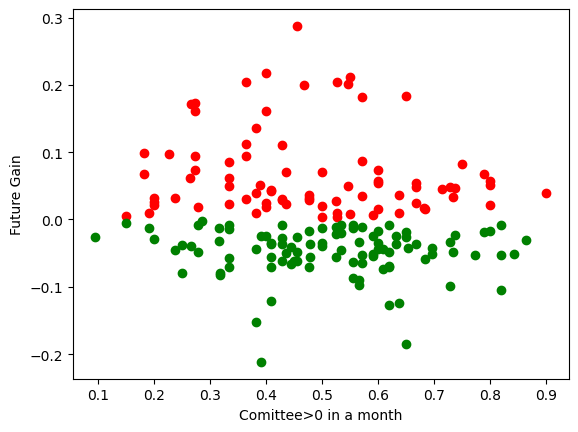

In [77]:
#暂时只跑了15只左右，have a taste#
df = pd.DataFrame()
df["Stock"] = data[0]
df["Order"] = data[1]
df["FutureGrowth"] = data[2]

plt.style.use("default")
fig, ax = plt.subplots(1)

df_loc = df.loc[(df["FutureGrowth"] > 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$gain$"),color = "red")

df_loc = df.loc[(df["FutureGrowth"] <= 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$loss$"),color = "green")

plt.xlabel("Comittee>0 in a month")
plt.ylabel("Future Gain")

只对现在权重排名前15的股票，$15*12$个数据点进行作图

In [79]:
bs.login()
data =[[],[],[]]
for cod in ts.get_hs300s().sort_values(by = "weight",ascending = False).head(15)["code"]:
    time.sleep(1)
    rs = bs.query_history_k_data_plus(code = codetransform(cod,api = "bs"),fields="date,close,pctChg",start_date='2019-01-01', end_date='2020-01-31',frequency="m")
    dic = stocktick(cod)
    df_rs = bao_2_df(rs)["pctChg"]
    for i in dic.keys():
        try:
            data[0].append(cod)
            data[1].append(dic[i][0]/dic[i][1])
            data[2].append(float(df_rs[int(i)])/100)
        except KeyError or IndexError:
            print("KeyError"+str(cod)+";"+str(i))
            continue
bs.logout()

df = pd.DataFrame()
df["Stock"] = data[0]
df["Order"] = data[1]
df["FutureGrowth"] = data[2]

plt.style.use("default")
fig, ax = plt.subplots(1)

df_loc = df.loc[(df["FutureGrowth"] > 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$gain$"),color = "red")

df_loc = df.loc[(df["FutureGrowth"] <= 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$loss$"),color = "green")

plt.xlabel("Comittee>0 in a month")
plt.ylabel("Future Gain")

login success!
login success!
done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190102
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190109
AttributeError@2019-01-09
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190110
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=s

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190521
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190523
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190524
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190527
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190528
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190529
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190530
AttributeError@2019-05-30
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190531
AttributeError@2019-05-31
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190603
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190910
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190911
AttributeError@2019-09-11
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190912
AttributeError@2019-09-12
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190916
AttributeError@2019-09-16
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190917
AttributeError@2019-09-17
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190918
AttributeError@2019-09-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190919
AttributeError@2019-09-19
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190920
AttributeError@2019-09-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601318&d=20190923
AttributeError@2019-09-23
http://st

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190124
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190130
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190131
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190201
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190212
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190214
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190619
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190620
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190621
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190624
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190625
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190626
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190627
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190628
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190701
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190702
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20190703
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191112
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191113
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191118
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191119
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191120
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600519&d=20191121
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190327
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190328
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190329
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190401
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190402
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190403
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190404
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190408
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190409
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190410
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190411
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190814
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190815
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190816
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190819
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190820
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190821
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190822
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190823
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190826
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190827
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600036&d=20190828
http://stock.gtimg.cn/data/index.php?appn=d

done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190102
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190109
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190110
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190116
http://stock.gtimg.cn/data/index.php?

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190524
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190527
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190528
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190529
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190530
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190531
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190603
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190604
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190605
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190606
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20190610
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191015
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191016
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191017
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191018
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191021
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191022
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191023
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191024
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191025
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191028
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600276&d=20191029
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190304
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190305
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190306
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190307
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190308
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190311
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190312
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190313
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190314
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190315
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190318
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190709
AttributeError@2019-07-09
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190710
AttributeError@2019-07-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190711
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190712
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190715
AttributeError@2019-07-15
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190716
AttributeError@2019-07-16
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190717
AttributeError@2019-07-17
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190718
AttributeError@2019-07-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20190719
http://stock.gtimg.cn/data/index.php?appn=detail&action=downl

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191106
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191112
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191113
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191114
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191118
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191119
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000858&d=20191120
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190325
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190326
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190327
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190328
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190329
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190401
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190402
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190403
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190404
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190408
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190409
AttributeError@2019-04-09
http://stock.gtim

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190806
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190807
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190808
AttributeError@2019-08-08
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190809
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190812
AttributeError@2019-08-12
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190813
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190814
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190815
AttributeError@2019-08-15
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190816
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20190819
http://stock.gtimg.cn/data/index.php?appn=detail&act

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191223
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191224
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191230
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000333&d=20191231
done!
login success!
done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190102
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190104
http://stock.gti

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190510
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190513
AttributeError@2019-05-13
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190514
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190515
AttributeError@2019-05-15
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190516
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190517
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190520
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190521
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190523
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190920
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190923
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190924
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190925
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190926
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190927
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20190930
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20191008
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20191009
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20191010
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000651&d=20191011
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190212
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190214
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190215
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190218
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190219
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190220
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190221
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190222
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190225
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190614
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190617
AttributeError@2019-06-17
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190618
AttributeError@2019-06-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190619
AttributeError@2019-06-19
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190620
AttributeError@2019-06-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190621
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190624
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190625
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190626
AttributeError@2019-06-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20190627


http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191014
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191015
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191016
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191017
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191018
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191021
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191022
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191023
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191024
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191025
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601166&d=20191028
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190301
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190304
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190305
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190306
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190307
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190308
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190311
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190312
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190313
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190314
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190315
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190717
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190718
AttributeError@2019-07-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190719
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190722
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190723
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190724
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190725
AttributeError@2019-07-25
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190726
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190729
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20190730
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191204
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191205
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191206
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191209
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191210
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191212
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191213
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191216
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191217
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600030&d=20191218
http://stock.gtimg.cn/data/index.php?appn=d

AttributeError@2019-04-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190419
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190422
AttributeError@2019-04-22
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190423
AttributeError@2019-04-23
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190424
AttributeError@2019-04-24
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190425
AttributeError@2019-04-25
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190426
AttributeError@2019-04-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190429
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190430
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190506
AttributeError@2019-05-06
http://stock.gtimg.cn/data/index.ph

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190815
AttributeError@2019-08-15
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190816
AttributeError@2019-08-16
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190819
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190820
AttributeError@2019-08-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190821
AttributeError@2019-08-21
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190822
AttributeError@2019-08-22
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190823
AttributeError@2019-08-23
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190826
AttributeError@2019-08-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20190827
AttributeError@2019-08-27
http://st

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20191225
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20191226
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20191227
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20191230
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600887&d=20191231
done!
login success!
done!
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190102
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190103
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190109
http://stock.gti

AttributeError@2019-05-13
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190514
AttributeError@2019-05-14
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190515
AttributeError@2019-05-15
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190516
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190517
AttributeError@2019-05-17
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190520
AttributeError@2019-05-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190521
AttributeError@2019-05-21
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190522
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190523
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190524
AttributeError@2019-05-24
http://stock.gtimg.cn/data/index.ph

AttributeError@2019-08-30
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190902
AttributeError@2019-09-02
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190903
AttributeError@2019-09-03
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190904
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190905
AttributeError@2019-09-05
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190906
AttributeError@2019-09-06
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190909
AttributeError@2019-09-09
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190910
AttributeError@2019-09-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190911
AttributeError@2019-09-11
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600900&d=20190912
Attribute

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190115
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190116
AttributeError@2019-01-16
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190117
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190118
AttributeError@2019-01-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190123
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190124
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=

AttributeError@2019-05-31
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190603
AttributeError@2019-06-03
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190604
AttributeError@2019-06-04
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190605
AttributeError@2019-06-05
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190606
AttributeError@2019-06-06
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190610
AttributeError@2019-06-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190611
AttributeError@2019-06-11
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190612
AttributeError@2019-06-12
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190613
AttributeError@2019-06-13
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz0

AttributeError@2019-09-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190923
AttributeError@2019-09-23
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190924
AttributeError@2019-09-24
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190925
AttributeError@2019-09-25
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190926
AttributeError@2019-09-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190927
AttributeError@2019-09-27
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20190930
AttributeError@2019-09-30
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20191008
AttributeError@2019-10-08
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20191009
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz000002&d=20191010
Attribute

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190117
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190118
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190121
AttributeError@2019-01-21
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190123
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190124
AttributeError@2019-01-24
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190130
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=

AttributeError@2019-06-03
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190604
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190605
AttributeError@2019-06-05
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190606
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190610
AttributeError@2019-06-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190611
AttributeError@2019-06-11
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190612
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190613
AttributeError@2019-06-13
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190614
AttributeError@2019-06-14
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190617
AttributeError@2019-06-17
http://stock.gtimg.cn/data/index.ph

AttributeError@2019-09-23
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190924
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190925
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190926
AttributeError@2019-09-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190927
AttributeError@2019-09-27
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20190930
AttributeError@2019-09-30
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20191008
AttributeError@2019-10-08
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20191009
AttributeError@2019-10-09
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20191010
AttributeError@2019-10-10
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sz002475&d=20191011
AttributeError@2019-10-11
http://st

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190123
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190124
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190130
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190131
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190201
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190211
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190212
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190614
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190617
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190618
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190619
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190620
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190621
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190624
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190625
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190626
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190627
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20190628
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191031
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191101
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191104
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191105
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191106
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191107
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191108
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191111
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191112
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191113
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh600016&d=20191114
http://stock.gtimg.cn/data/index.php?appn=d

http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190319
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190320
AttributeError@2019-03-20
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190321
AttributeError@2019-03-21
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190322
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190325
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190326
AttributeError@2019-03-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190327
AttributeError@2019-03-27
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190328
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190329
AttributeError@2019-03-29
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190401


http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190718
AttributeError@2019-07-18
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190719
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190722
AttributeError@2019-07-22
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190723
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190724
AttributeError@2019-07-24
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190725
AttributeError@2019-07-25
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190726
AttributeError@2019-07-26
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190729
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190730
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20190731


http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191121
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191122
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191125
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191126
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191127
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191128
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191129
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191202
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191203
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191204
http://stock.gtimg.cn/data/index.php?appn=detail&action=download&c=sh601328&d=20191205
http://stock.gtimg.cn/data/index.php?appn=d

KeyboardInterrupt: 

Text(0, 0.5, 'Future Gain')

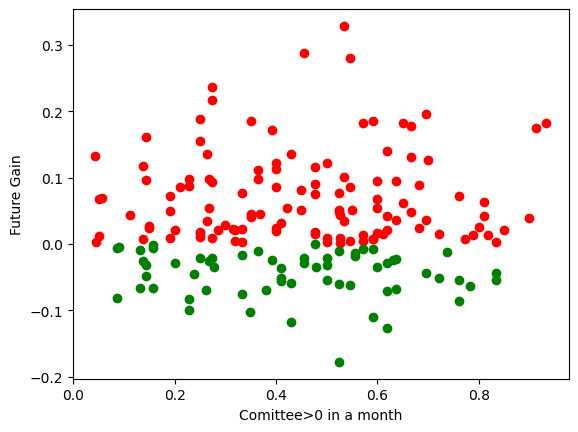

In [80]:
df = pd.DataFrame()
df["Stock"] = data[0]
df["Order"] = data[1]
df["FutureGrowth"] = data[2]

plt.style.use("default")
fig, ax = plt.subplots(1)

df_loc = df.loc[(df["FutureGrowth"] > 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$gain$"),color = "red")

df_loc = df.loc[(df["FutureGrowth"] <= 0)]
ax.scatter(df_loc["Order"],df_loc["FutureGrowth"],label = str("$loss$"),color = "green")

plt.xlabel("Comittee>0 in a month")
plt.ylabel("Future Gain")